In [2]:
import sys
sys.path.append('C:/Users/Sela#/Documents/Jupyter Projects/Zipline_Pyfolio')

In [12]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

import zipline
%load_ext zipline
#!zipline ingest

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [5]:
%%zipline --start 2004-1-1 --end 2010-1-1 -o results.pickle

# Zipline trading algorithm
# Taken from zipline.examples.olmar

import numpy as np

from zipline.finance import commission, slippage

STOCKS = ['AMD', 'CERN', 'COST', 'DELL', 'GPS', 'INTC', 'MMM']


# On-Line Portfolio Moving Average Reversion

# More info can be found in the corresponding paper:
# http://icml.cc/2012/papers/168.pdf
def initialize(algo, eps=1, window_length=5):
    algo.stocks = STOCKS
    algo.sids = [algo.symbol(symbol) for symbol in algo.stocks]
    algo.m = len(algo.stocks)
    algo.price = {}
    algo.b_t = np.ones(algo.m) / algo.m
    algo.eps = eps
    algo.window_length = window_length

    algo.set_commission(commission.PerShare(cost=0))
    algo.set_slippage(slippage.FixedSlippage(spread=0))


def handle_data(algo, data):
    m = algo.m

    x_tilde = np.zeros(m)
    b = np.zeros(m)

    # find relative moving average price for each asset
    mavgs = data.history(algo.sids, 'price', algo.window_length, '1d').mean()
    for i, sid in enumerate(algo.sids):
        price = data.current(sid, "price")
        # Relative mean deviation
        x_tilde[i] = mavgs[sid] / price

    ###########################
    # Inside of OLMAR (algo 2)
    x_bar = x_tilde.mean()

    # market relative deviation
    mark_rel_dev = x_tilde - x_bar

    # Expected return with current portfolio
    exp_return = np.dot(algo.b_t, x_tilde)
    weight = algo.eps - exp_return
    variability = (np.linalg.norm(mark_rel_dev)) ** 2

    # test for divide-by-zero case
    if variability == 0.0:
        step_size = 0
    else:
        step_size = max(0, weight / variability)

    b = algo.b_t + step_size * mark_rel_dev
    b_norm = simplex_projection(b)
    np.testing.assert_almost_equal(b_norm.sum(), 1)

    rebalance_portfolio(algo, data, b_norm)

    # update portfolio
    algo.b_t = b_norm


def rebalance_portfolio(algo, data, desired_port):
    # rebalance portfolio
    for i, sid in enumerate(algo.sids):
        algo.order_target_percent(sid, desired_port[i])


def simplex_projection(v, b=1):
    """Projection vectors to the simplex domain
    Implemented according to the paper: Efficient projections onto the
    l1-ball for learning in high dimensions, John Duchi, et al. ICML 2008.
    Implementation Time: 2011 June 17 by Bin@libin AT pmail.ntu.edu.sg
    Optimization Problem: min_{w}\| w - v \|_{2}^{2}
    s.t. sum_{i=1}^{m}=z, w_{i}\geq 0
    Input: A vector v \in R^{m}, and a scalar z > 0 (default=1)
    Output: Projection vector w
    :Example:
    >>> proj = simplex_projection([.4 ,.3, -.4, .5])
    >>> print(proj)
    array([ 0.33333333, 0.23333333, 0. , 0.43333333])
    >>> print(proj.sum())
    1.0
    Original matlab implementation: John Duchi (jduchi@cs.berkeley.edu)
    Python-port: Copyright 2013 by Thomas Wiecki (thomas.wiecki@gmail.com).
    """

    v = np.asarray(v)
    p = len(v)

    # Sort v into u in descending order
    v = (v > 0) * v
    u = np.sort(v)[::-1]
    sv = np.cumsum(u)

    rho = np.where(u > (sv - b) / np.arange(1, p + 1))[0][-1]
    theta = np.max([0, (sv[rho] - b) / (rho + 1)])
    w = (v - theta)
    w[w < 0] = 0
    return w

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2004-01-02 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.00,1.000000e+07,0.000000e+00,0.000000e+00,...,0.0,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0
2004-01-05 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,-10126240.51,-1.262405e+05,1.012624e+07,1.012624e+07,...,0.0,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,2,[{'order_id': '764996acc21e4bb29616644ad0185e4...,0.0
2004-01-06 21:00:00+00:00,0.072181,0.007876,None,0.0,0.0,None,109847.75,-1.639276e+04,1.009515e+07,1.009515e+07,...,0.0,0.0,0,NaN,-1.262405e+05,1.012624e+07,1.012624e+07,3,[{'order_id': '4c026df627f64a3c886af5c5ef47882...,0.0
2004-01-07 21:00:00+00:00,0.064697,0.013910,None,0.0,0.0,None,38098.34,2.170558e+04,1.011740e+07,1.011740e+07,...,0.0,0.0,0,NaN,-1.639276e+04,1.009515e+07,1.009515e+07,4,[{'order_id': '9ba747cc981442c883df0fed7a69fba...,0.0
2004-01-08 21:00:00+00:00,0.202046,-0.010300,None,0.0,0.0,None,15955.16,3.766074e+04,9.859341e+06,9.859341e+06,...,0.0,0.0,0,-2.977554,2.170558e+04,1.011740e+07,1.011740e+07,5,[{'order_id': 'abc1a66e27504713b3e24f169c32acb...,0.0
2004-01-09 21:00:00+00:00,0.181404,-0.009871,None,0.0,0.0,None,-35493.79,2.166950e+03,9.899121e+06,9.899121e+06,...,0.0,0.0,0,-2.600576,3.766074e+04,9.859341e+06,9.859341e+06,6,[{'order_id': 'a6edbe90d82e434a858b317b35dce71...,0.0
2004-01-12 21:00:00+00:00,0.169354,-0.005599,None,0.0,0.0,None,-3383.39,-1.216440e+03,9.945227e+06,9.945227e+06,...,0.0,0.0,0,-1.323460,2.166950e+03,9.899121e+06,9.899121e+06,7,[{'order_id': '72bfc258adb545108c2eb115c56d7c2...,0.0
2004-01-13 21:00:00+00:00,0.162138,-0.013664,None,0.0,0.0,None,-622.71,-1.839150e+03,9.865204e+06,9.865204e+06,...,0.0,0.0,0,-2.977182,-1.216440e+03,9.945227e+06,9.945227e+06,8,[{'order_id': '5e8075fd65d048d9bfdf4d33ecc1c1c...,0.0
2004-01-14 21:00:00+00:00,0.156543,-0.008086,None,0.0,0.0,None,231.70,-1.607450e+03,9.920746e+06,9.920746e+06,...,0.0,0.0,0,-1.620372,-1.839150e+03,9.865204e+06,9.865204e+06,9,[{'order_id': '5fb534d7f8864135aa2eda607890457...,0.0
2004-01-15 21:00:00+00:00,0.147731,-0.010212,None,0.0,0.0,None,-2959.58,-4.567030e+03,9.902449e+06,9.902449e+06,...,0.0,0.0,0,-1.956761,-1.607450e+03,9.920746e+06,9.920746e+06,10,[{'order_id': '89116fb923c3440293fc94487a57444...,0.0


# Extract metrics

In [6]:
import pandas as pd

results = pd.read_pickle('results.pickle')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

# Single plot example

Text(0.5, 0, 'Date')

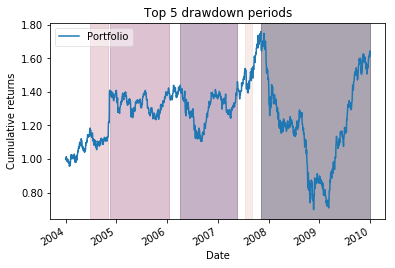

In [7]:
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

# Full tear sheet example

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.30,2007-11-06,2008-11-20,NaT,NaN
1,23.24,2006-04-06,2006-09-07,2007-05-22,294
2,12.51,2004-11-15,2005-10-12,2006-01-11,303
3,10.90,2004-06-25,2004-08-12,2004-11-04,95
4,9.47,2007-07-16,2007-08-06,2007-09-04,37


Stress Events,mean,min,max
Lehman,-0.28%,-7.41%,4.40%
Aug07,0.35%,-2.96%,3.03%
Mar08,-0.43%,-3.10%,3.34%
Sept08,-0.68%,-7.41%,3.99%
2009Q1,-0.35%,-4.98%,3.36%
2009Q2,0.71%,-3.78%,6.17%
Low Volatility Bull Market,0.01%,-6.11%,6.45%
GFC Crash,-0.08%,-7.58%,9.71%
Recovery,0.32%,-3.78%,6.17%


Top 10 long positions of all time,max
sid,
COST,100.74%
MMM,92.35%
CERN,84.47%
DELL,72.76%
AMD,71.05%
INTC,69.19%
GPS,62.11%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
COST,100.74%
MMM,92.35%
CERN,84.47%
DELL,72.76%
AMD,71.05%
INTC,69.19%
GPS,62.11%


Summary stats,All trades,Short trades,Long trades
Total number of round_trips,3987.00,3.00,3984.00
Percent profitable,0.49,0.00,0.49
Winning round_trips,1936.00,0.00,1936.00
Losing round_trips,2041.00,0.00,2041.00
Even round_trips,10.00,3.00,7.00


PnL stats,All trades,Short trades,Long trades
Total profit,$6120677.93,$0.00,$6120677.93
Gross profit,$37886584.96,$0.00,$37886584.96
Gross loss,$-31765907.03,$0.00,$-31765907.03
Profit factor,$1.19,$nan,$1.19
Avg. trade net profit,$1535.16,$0.00,$1536.31
Avg. winning trade,$19569.52,$nan,$19569.52
Avg. losing trade,$-15563.89,$nan,$-15563.89
Ratio Avg. Win:Avg. Loss,$1.26,$nan,$1.26
Largest winning trade,$1553171.02,$0.00,$1553171.02
Largest losing trade,$-1252529.24,$0.00,$-1252529.24


Duration stats,All trades,Short trades,Long trades
Avg duration,21 days 18:56:23.295711,20:59:59,21 days 19:19:03.976656
Median duration,17 days 23:00:00,20:59:59,18 days 00:00:00
Longest duration,109 days 01:00:00,20:59:59,109 days 01:00:00
Shortest duration,0 days 03:00:01,20:59:59,0 days 03:00:01


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.01%,0.00%,0.01%
Avg returns winning,0.16%,nan%,0.16%
Avg returns losing,-0.13%,nan%,-0.13%
Median returns all round_trips,-0.00%,0.00%,-0.00%
Median returns winning,0.02%,nan%,0.02%
Median returns losing,-0.01%,nan%,-0.01%
Largest winning trade,12.13%,0.00%,12.13%
Largest losing trade,-9.14%,0.00%,-9.14%


Symbol stats,AMD,CERN,COST,DELL,GPS,INTC,MMM
Avg returns all round_trips,-0.00%,0.03%,0.03%,-0.03%,-0.01%,0.04%,0.01%
Avg returns winning,0.37%,0.19%,0.12%,0.13%,0.13%,0.15%,0.10%
Avg returns losing,-0.34%,-0.16%,-0.06%,-0.19%,-0.11%,-0.06%,-0.08%
Median returns all round_trips,-0.00%,0.00%,0.00%,-0.00%,-0.00%,-0.00%,-0.00%
Median returns winning,0.07%,0.02%,0.01%,0.01%,0.02%,0.03%,0.01%
Median returns losing,-0.02%,-0.01%,-0.01%,-0.01%,-0.01%,-0.00%,-0.01%
Largest winning trade,12.13%,5.94%,2.95%,3.36%,3.54%,2.33%,2.22%
Largest losing trade,-9.14%,-4.67%,-3.47%,-6.60%,-8.30%,-4.60%,-4.02%


Profitability (PnL / PnL total) per name,
symbol,
INTC,45.10%
COST,42.42%
CERN,35.52%
MMM,13.51%
GPS,-2.49%
AMD,-7.15%
DELL,-26.91%


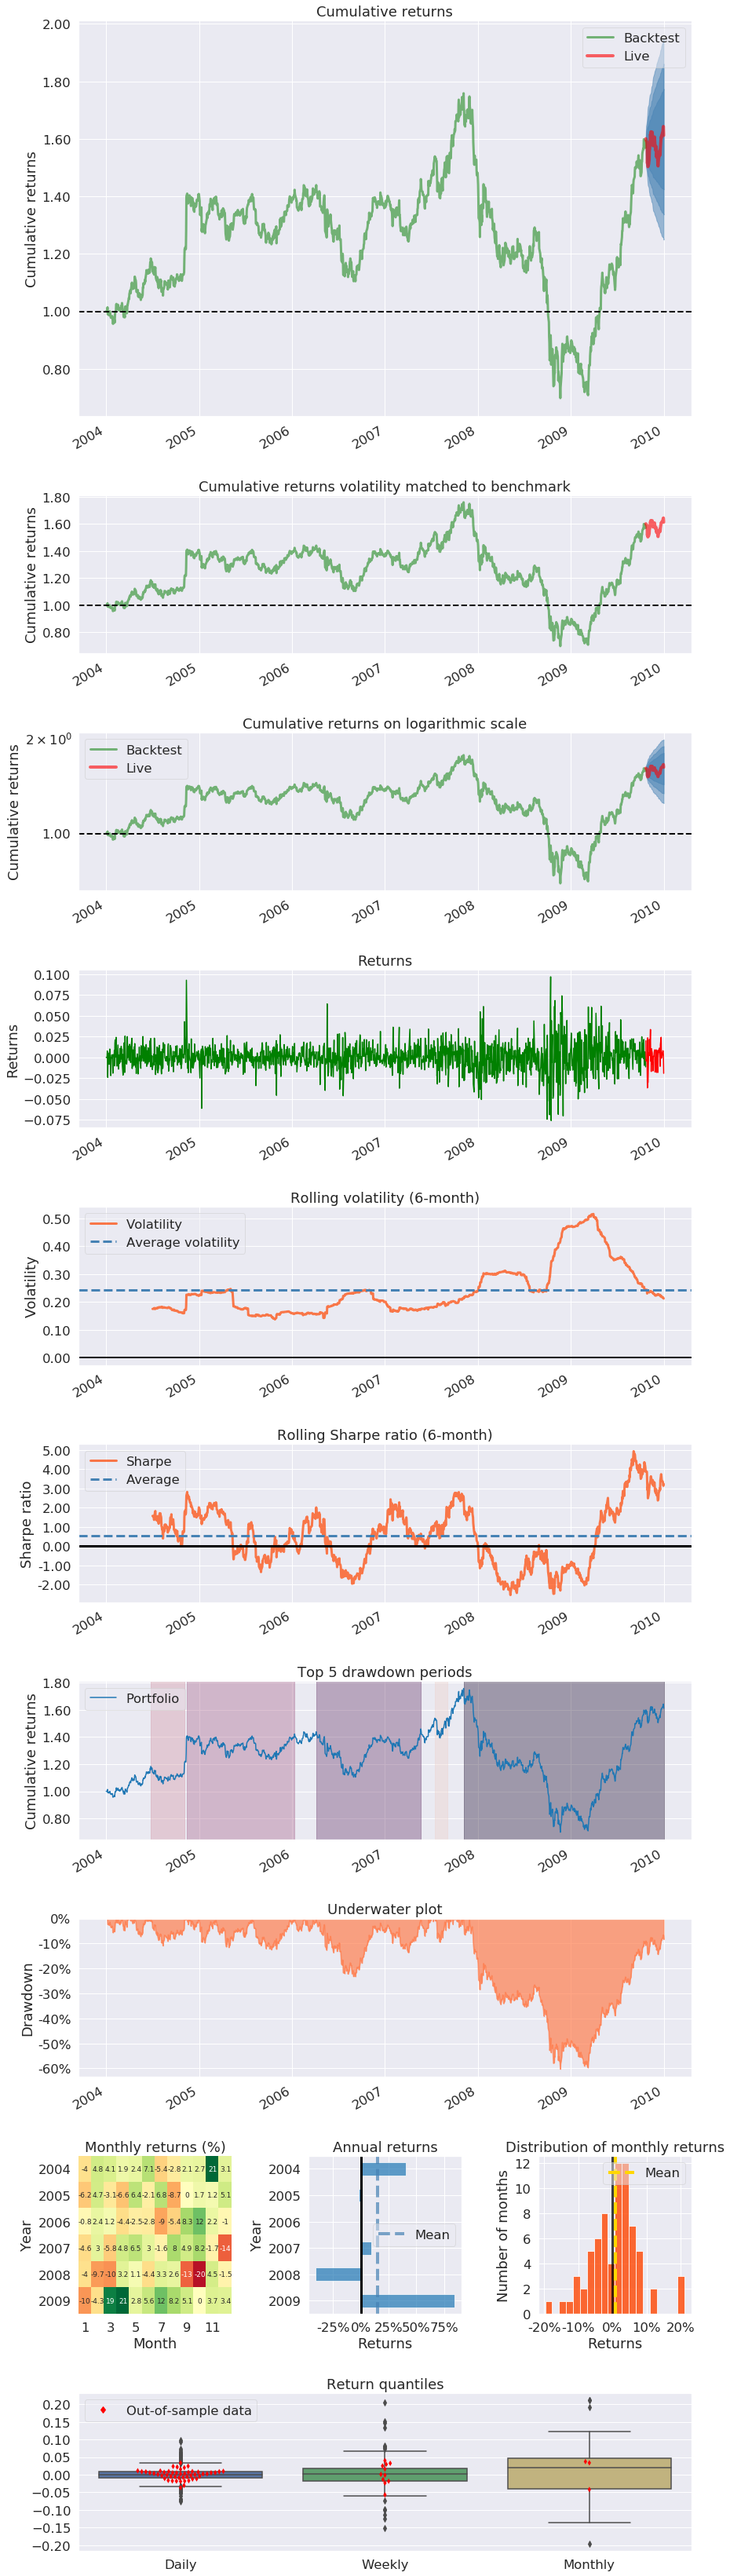

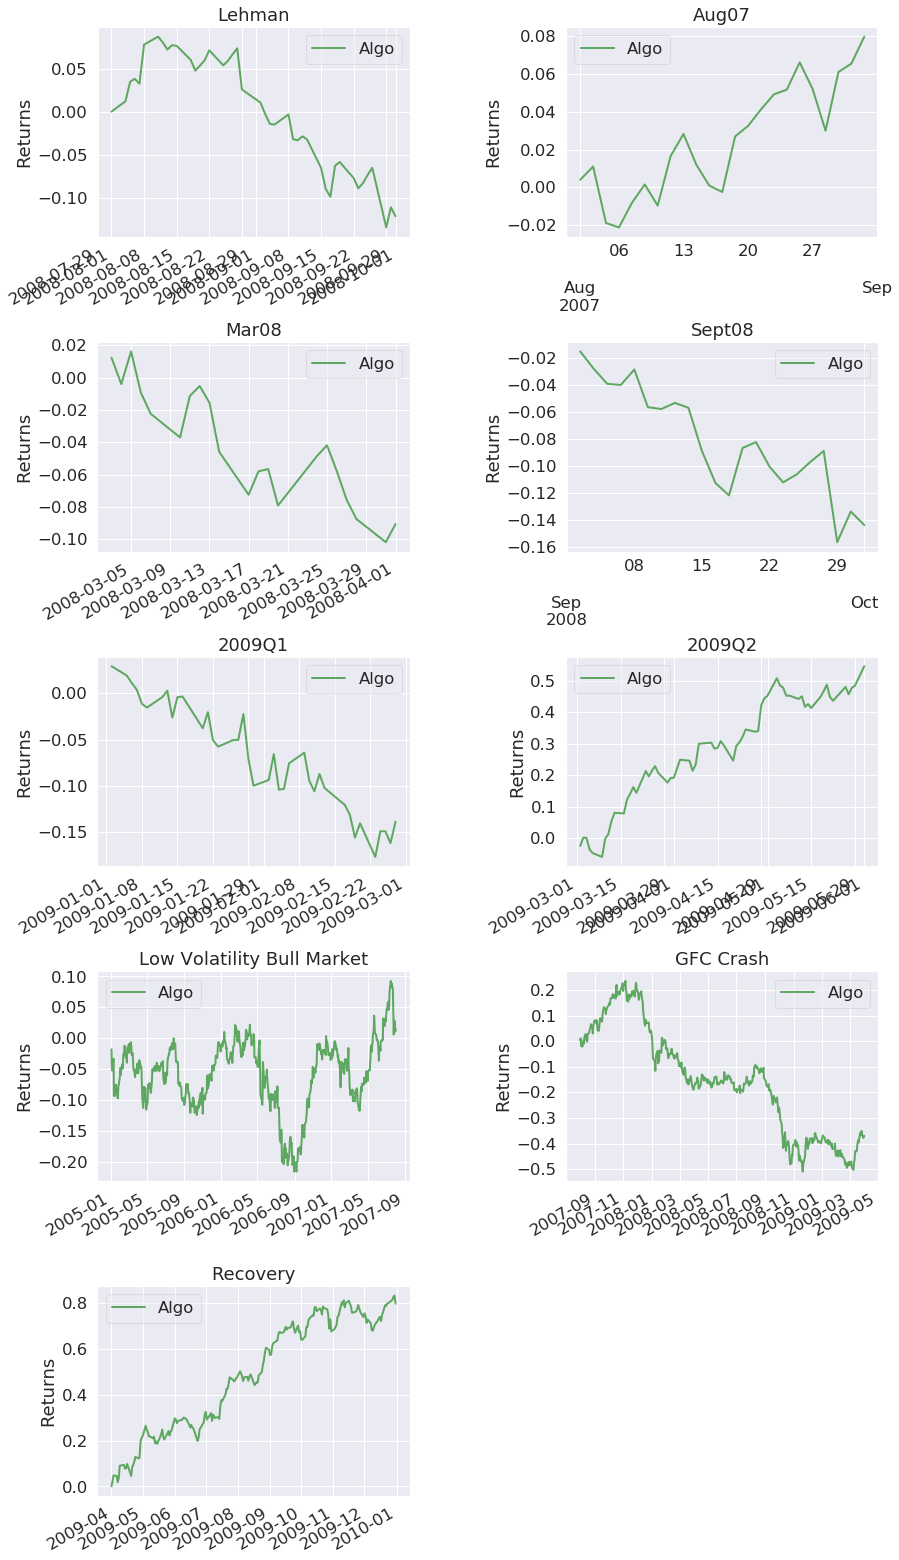

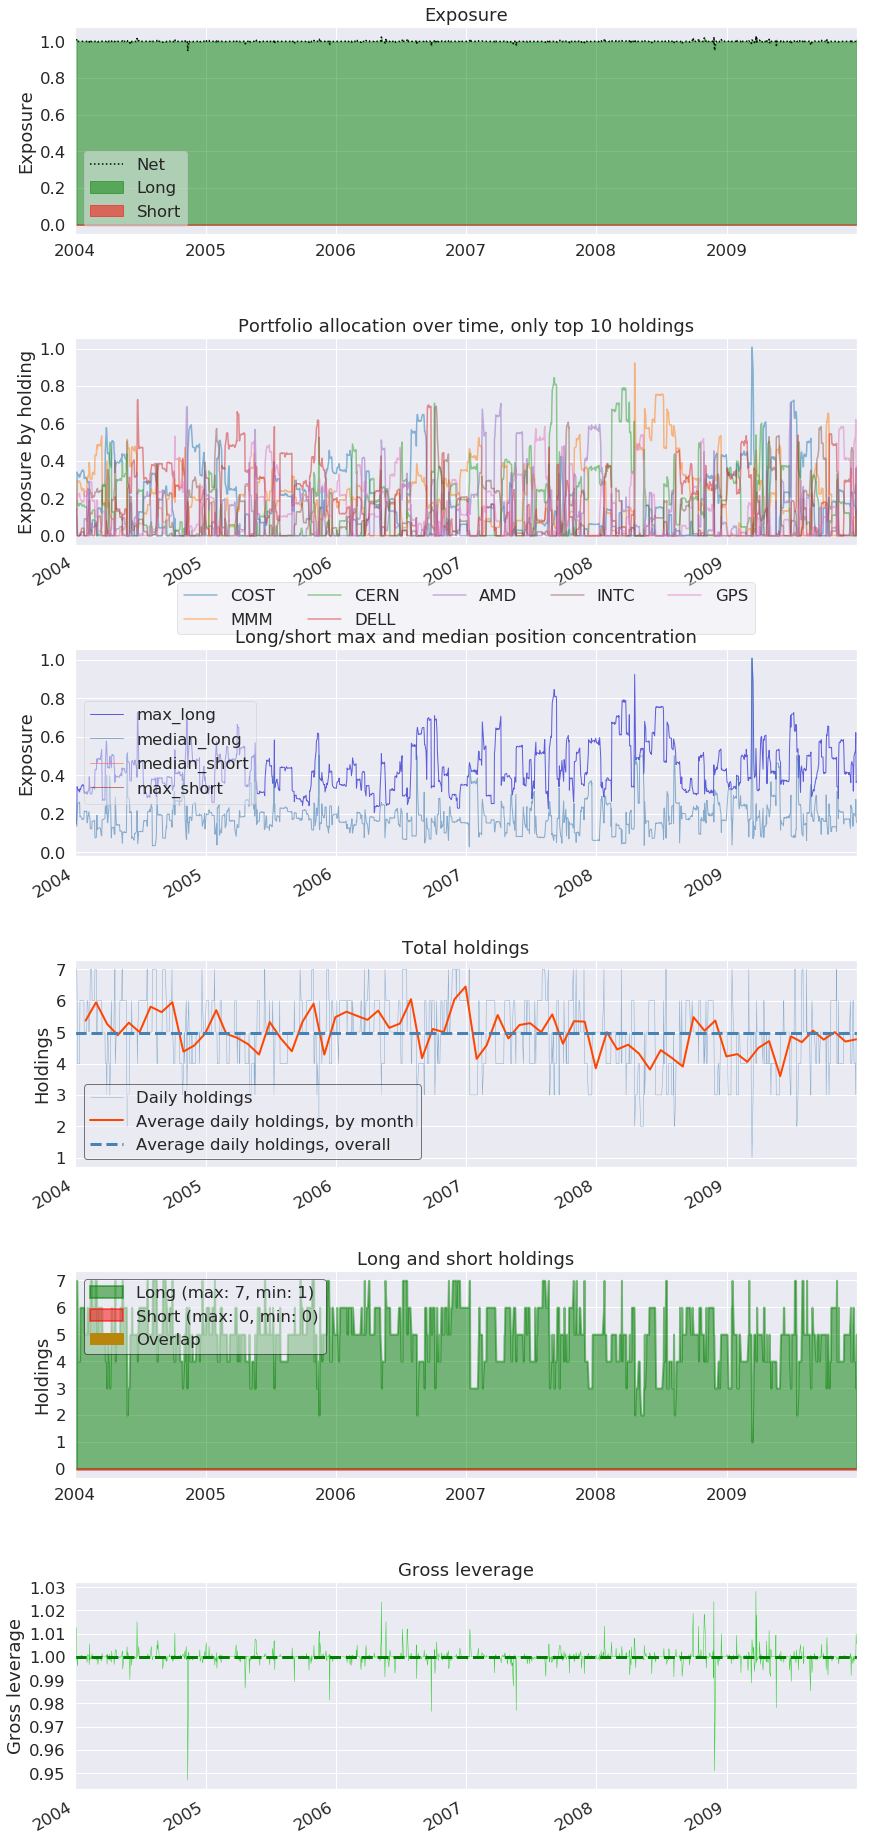

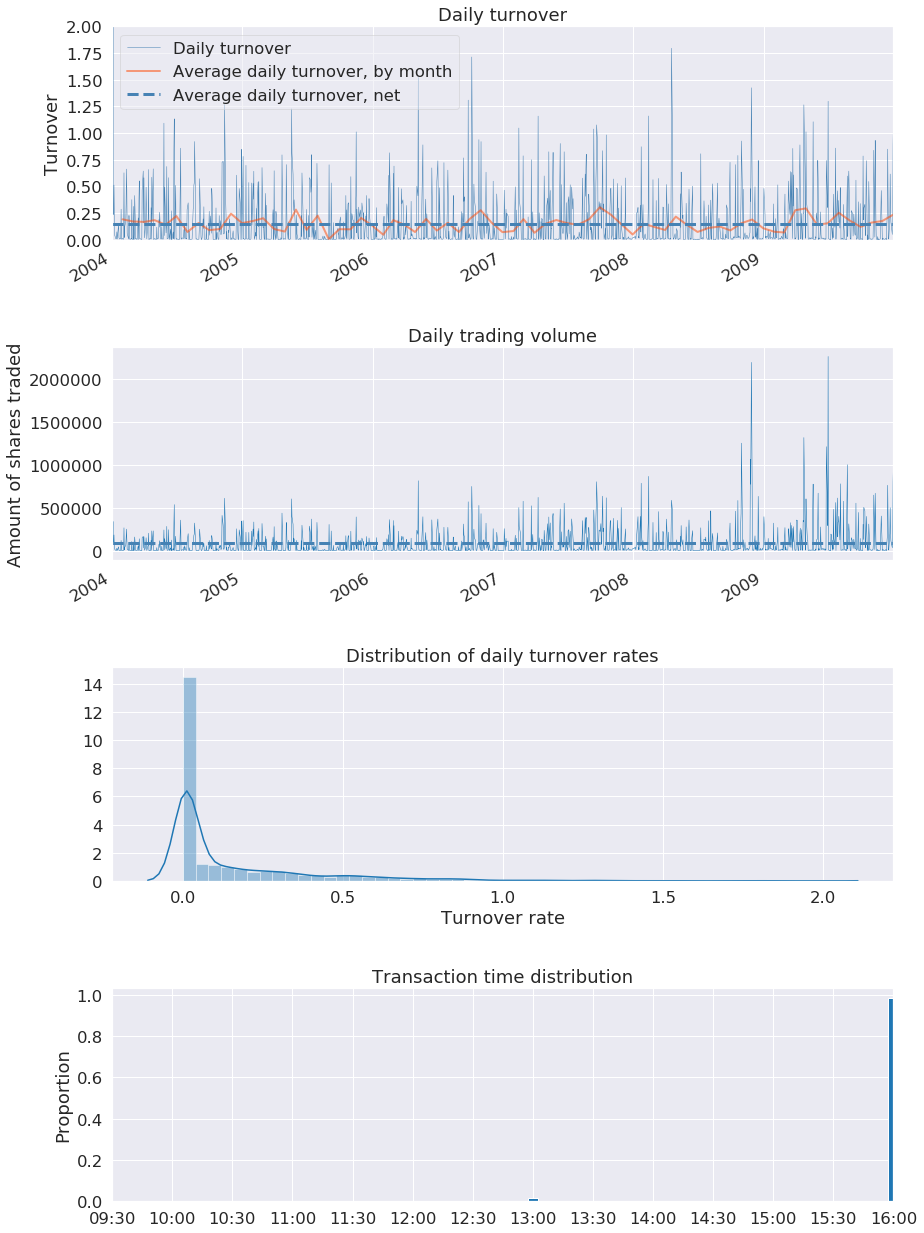

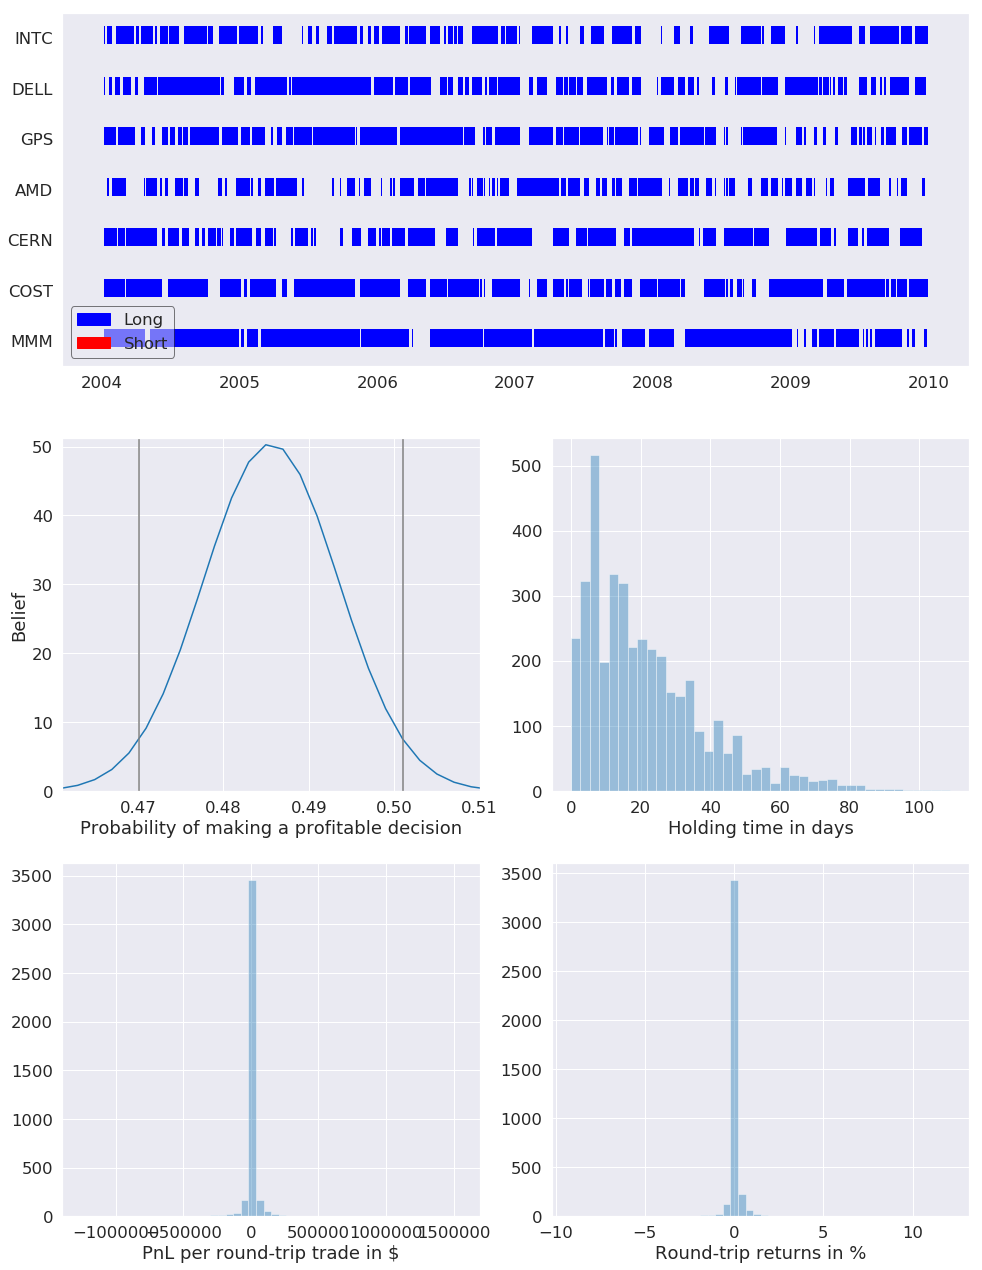

In [8]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date='2009-10-22', round_trips=True)

# Suppressing symbol output

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.30,2007-11-06,2008-11-20,NaT,NaN
1,23.24,2006-04-06,2006-09-07,2007-05-22,294
2,12.51,2004-11-15,2005-10-12,2006-01-11,303
3,10.90,2004-06-25,2004-08-12,2004-11-04,95
4,9.47,2007-07-16,2007-08-06,2007-09-04,37


Stress Events,mean,min,max
Lehman,-0.28%,-7.41%,4.40%
Aug07,0.35%,-2.96%,3.03%
Mar08,-0.43%,-3.10%,3.34%
Sept08,-0.68%,-7.41%,3.99%
2009Q1,-0.35%,-4.98%,3.36%
2009Q2,0.71%,-3.78%,6.17%
Low Volatility Bull Market,0.01%,-6.11%,6.45%
GFC Crash,-0.08%,-7.58%,9.71%
Recovery,0.32%,-3.78%,6.17%


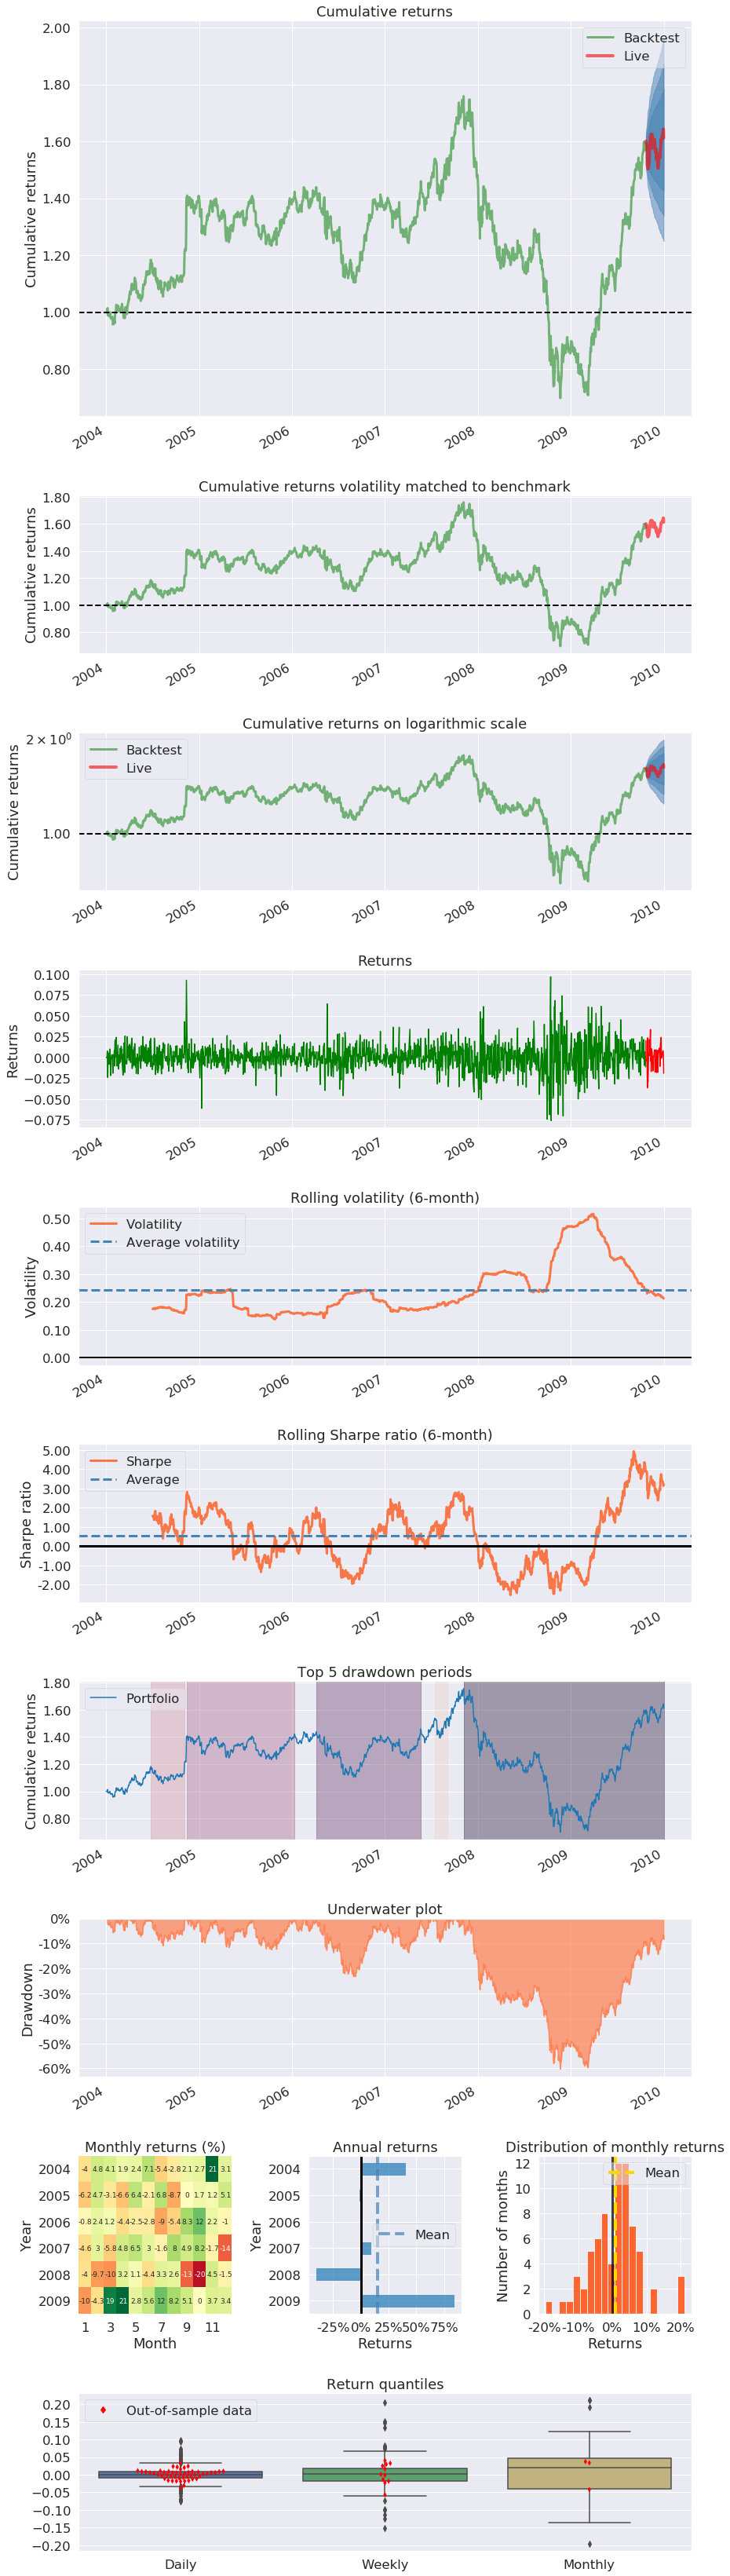

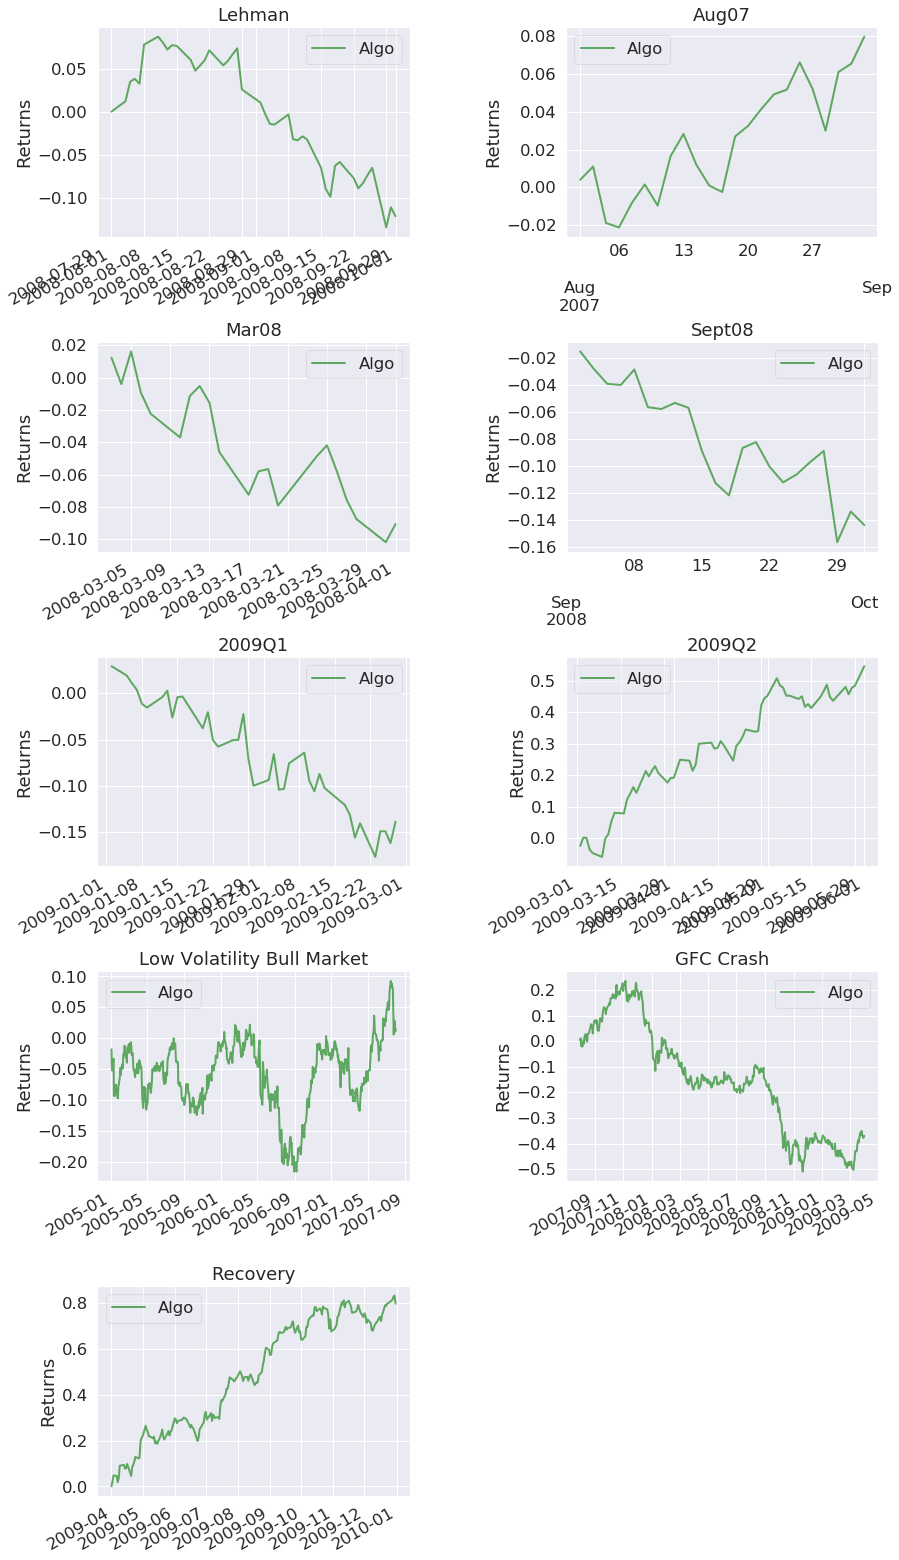

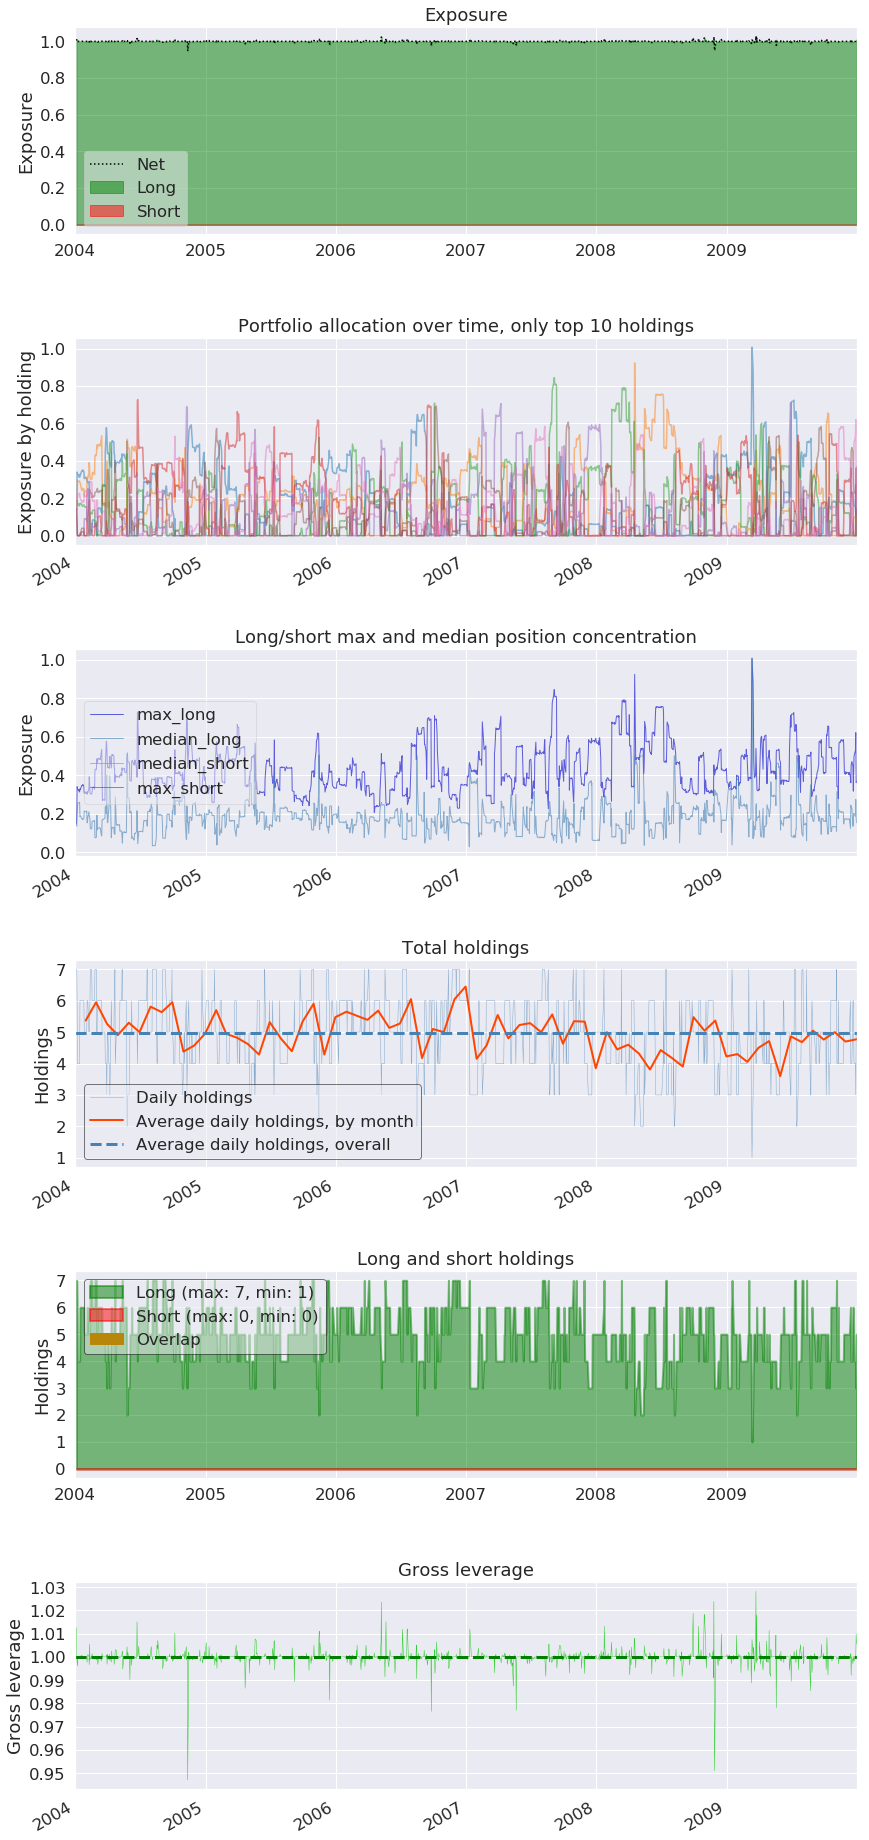

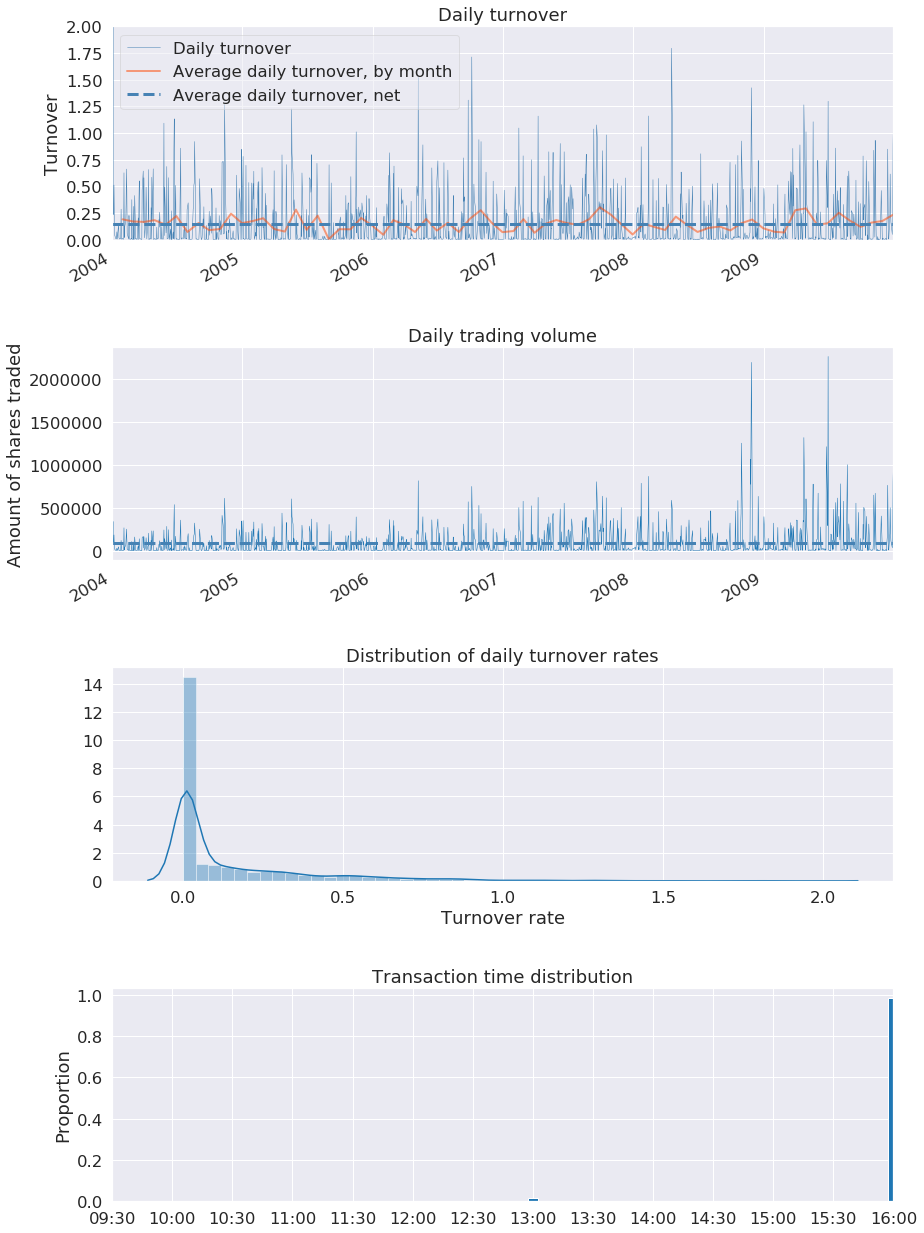

In [9]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date='2009-10-22', hide_positions=True)

In [10]:
Entire data start date: 2004-01-02
Entire data end date: 2009-12-31
In-sample months: 69
Out-of-sample months: 2

SyntaxError: invalid syntax (<ipython-input-10-86394e9d159b>, line 1)